# 1. Defina

## (a) Subgrafo

Subconjunto de vértices e arestas de um grafo

## Grafo bipartido

Pode ser definido como um grafo que pode ser dividido em dois conjuntos em que pode-se haver arestas entre vértices dos dois conjuntos, mas não entre dois vértices pertencentes ao mesmo conjunto.

## Grafo hamiltoniano

Um grafo é hamiltoniano se possui um ciclo hamiltoniano, isto é, um ciclo que, ao ser percorrido, nenhum dos vértices é visitado mais de uma vez.

## Grafo euleriano

Um grafo em que é possível visitar todas as arestas de modo a não visitar nenhuma mais de uma vez.

# 2. Descreva como o algoritmo de busca em profundidade funciona

Ao percorrer uma árvore usando o algoritmo de busca em profundidade, para cada vértice é visitado o primeiro vértice adjacente até que chegue em uma folha. Quando isso acontece é voltado para o vértice anterior e é visitado o próximo vértice adjacente, caso exista. Caso não exista o algoritmo continua voltando e repetindo os passos.

#3. Quantas arestas completam um grafo com n vértices? 

Para um grafo não direcionado são n(n-1) / 2 arestas. 

Para um grafo direcionado são n(n-1) arestas. 

#4. O que é um grafo isomorfo? Desenhe um exemplo

Dois grafos são ditos isomorfos se possuirem uma correspondencia entre eles de forma a preservar a relação de adjacência entre as arestas 

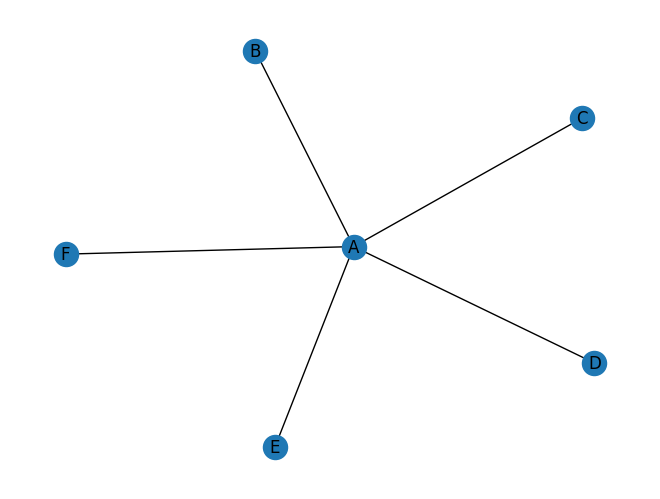

In [ ]:
import networkx as nx
g1=nx.Graph()
g1.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
g1.add_edges_from([('A','B'), ('A','C'), ('A','D'), 
                   ('A', 'E'), ('A', 'F')])
nx.draw(g1, with_labels=True)

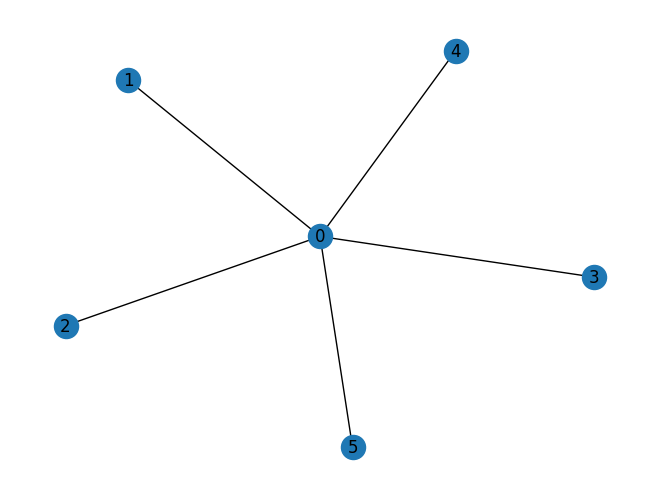

In [ ]:
g2 = nx.star_graph(5)
nx.draw(g2, with_labels=True)

Aferindo se são mesmo isoformos

In [ ]:
print(nx.is_isomorphic(g1,g2))

True


#5. Calcule o grau dos vértices para ambos os tipos de vértices na matriz de adjacência bipartida da figura abaixo. Encontre o(s) vértice(s) isolado(s).



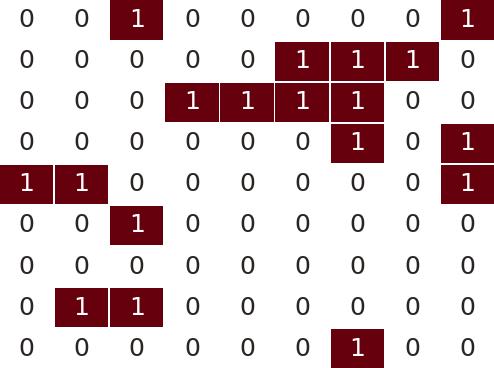

Graus grupo 1: [(0, 2), (1, 3), (2, 4), (3, 2), (4, 3), (5, 1), (6, 0), (7, 2), (8, 1)]
Graus grupo 2: [(9, 1), (10, 2), (11, 3), (12, 1), (13, 1), (14, 2), (15, 4), (16, 1), (17, 3)]
Vértices isolados: [6]


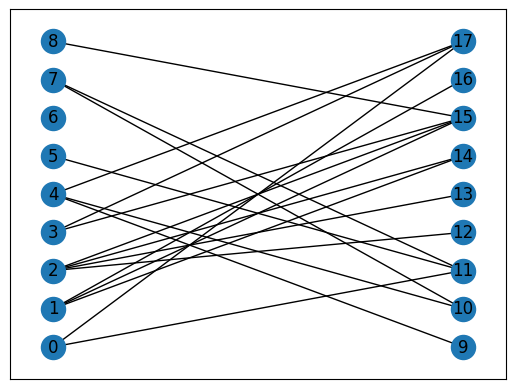

In [49]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

matrix = np.array([    
    [0,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,1,1,1,0],
    [0,0,0,1,1,1,1,0,0],
    [0,0,0,0,0,0,1,0,1],
    [1,1,0,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0]])

G = nx.Graph()
G.add_nodes_from(range(matrix.shape[0]), bipartite=0)
G.add_nodes_from(range(matrix.shape[0], matrix.shape[0] + matrix.shape[1]), bipartite=1)

for i, j in zip(*matrix.nonzero()):
    G.add_edge(i, j + matrix.shape[0])

degree_group1 = G.degree([n for n, d in G.nodes(data=True) if d['bipartite'] == 0])
degree_group2 = G.degree([n for n, d in G.nodes(data=True) if d['bipartite'] == 1])
isolated_nodes = [n for n in G.nodes() if G.degree(n) == 0]

print("Graus grupo 1:", degree_group1)
print("Graus grupo 2:", degree_group2)
print("Vértices isolados:", isolated_nodes)

pos = nx.bipartite_layout(G, [0, 1, 2, 3, 4, 5, 6, 7, 8])
nx.draw_networkx(G, pos)
plt.show()



#6. Dado o grafo direcionado G = (V, E) tal que V = {M, N, O, P, Q, R, S} e E ={(M, S), (N, O), (P, R), (N, S), (O, M), (N, Q), (O, M), (P, P), (S, M), (O, N),  (S, M), (N, R), (P, M), (M, S)}

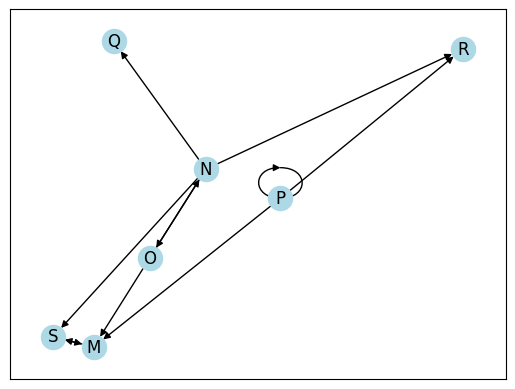

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = ['M', 'N', 'O', 'P', 'Q', 'R', 'S']

edges = [('M', 'S'), ('N', 'O'), ('P', 'R'), ('N', 'S'), ('O', 'M'), ('N', 'Q'),
         ('O', 'M'), ('P', 'P'), ('S', 'M'), ('O', 'N'), ('S', 'M'), ('N', 'R'),
         ('P', 'M'), ('M', 'S')]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_color='black')

plt.show()


## (a) Especifique, caso exista, um caminho simples do vértice M ao S


O caminho é simplesmente M -> S

##(b) Especifique, caso exista, um ciclo simples contendo ao menos 4 vértices

Se desconsiderarmos a direção dos vértices haveriam ciclos com 4 ou mais vértices. Mas sendo um grafo direcionado podemos ver que não há caminho em que tal ciclo seja possível.

##(c) O Grafo direcionado é conectado ou não conectado?

O grafo não é conectado pois não possui um caminho entre todos os nós do grafo. Por exemplo, não existe caminho entre o Q e nenhum outro nó.

##(d) Quais os graus dos vértices N e R?

O grau do vértice N é 4.
O grau do vértice R é 2

##(e) Represente o Grafo usando lista de adjacência

M: S

N: O, Q, S, R

O: M, N

P: R, M, P

Q:

R:

S: M



##(f) Represente o Grafo usando uma lista de adjacência

  M N O P Q R S

M 0 0 1 0 0 0 1

N 0 0 1 0 1 1 0

O 1 1 0 0 0 0 0

P 1 0 0 1 0 1 0

Q 0 0 0 0 0 0 0

R 0 1 0 0 0 0 0

S 1 1 0 0 0 0 0


#7. Desenhe as versões direcionadas e não direcionadas do Grafo G(V, E) de arestas V = {1, 2, 3, 4, 5, 6} e E = {(2, 5), (6, 1), (5, 3), (2, 3)}

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [(2, 5), (6, 1), (5, 3), (2, 3)]

**Versão direcionada**

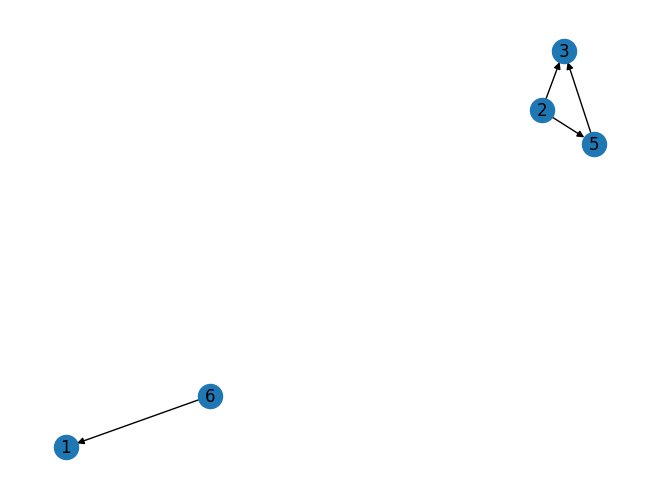

In [60]:
G_directed = nx.DiGraph()
G_directed.add_edges_from(edges)

nx.draw(G_directed, with_labels=True)
plt.show()

**Versão não direcionada**

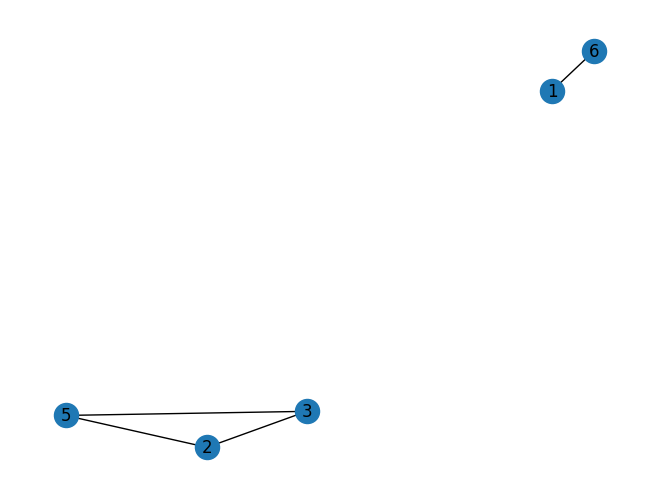

In [61]:
G_undirected = nx.Graph()
G_undirected.add_edges_from(edges)

nx.draw(G_undirected, with_labels=True)
plt.show()

#8. Quantas arestas tem um grafo com 3 vértices de grau 3 e um vértice de grau 5?

A soma dos graus em qualquer Grafo não direcionado é o dobro do número de arestas.Se temos 3 vértices de grau 3 e um vértice de grau 5, então a soma dos graus é: 3 + 3 + 3 + 5 = 14

Como cada aresta conecta 2 vértices, o número total de arestas no Grafo é metade da soma dos graus, logo o Grafo tem 7 arestas.

#9. O Sr. A é amigo da Sra. B, mas ela não gosta dele. Ela tem uma amizade recíproca com C e D, mas apenas C considera D um amigo. D também enviou solicitações de amizade para E, F, G e H, mas, até agora, apenas G respondeu. G também tem uma relação recíproca com A. Desenhe o gráfico direcionado correspondente

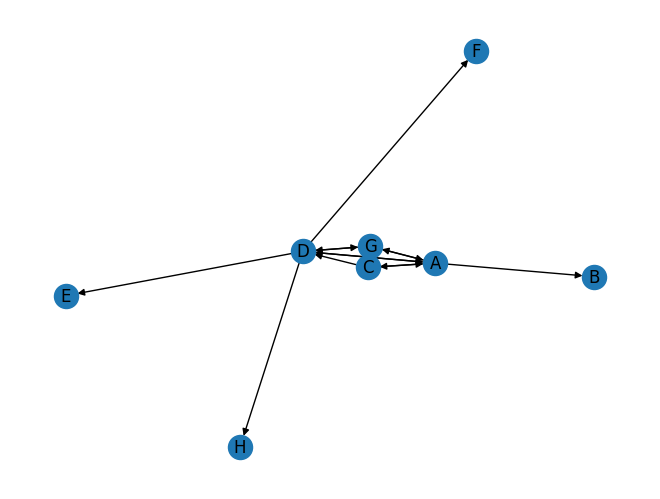

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [('A','B'), ('A','C'), ('C','A'), ('A','D'), ('D','A'), ('C','D'), ('D','E'), ('D','F'), ('D','G'), ('G','D'), ('D','H'), ('G','A'), ('A','G')]
G = nx.DiGraph()
G.add_edges_from(edges)

nx.draw(G, with_labels=True)
plt.show()


#10. Desenhe o gráfico do exercício anterior como não direcionado e ponderado, com o peso sendo 2 se a conexão for recíproca, 1 caso contrário

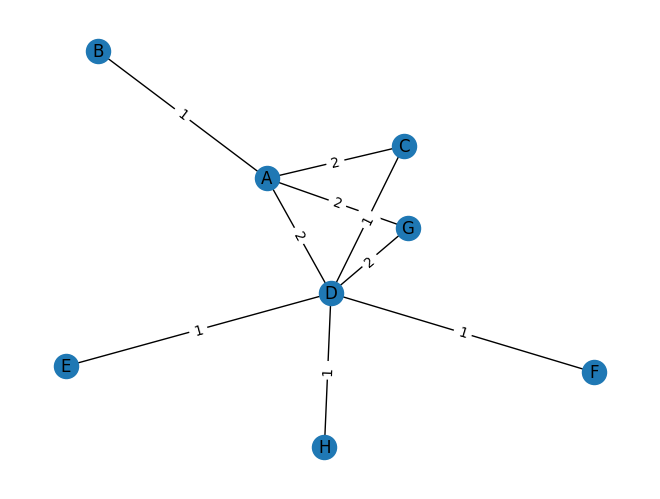

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [('A','B'), ('A','C'), ('C','A'), ('A','D'), ('D','A'), ('C','D'), ('D','E'), ('D','F'), ('D','G'), ('G','D'), ('D','H'), ('G','A'), ('A','G')]

G = nx.Graph()
G.add_edges_from(edges)

for edge in edges:
    if edge[::-1] in edges:
        G.add_edge(edge[0], edge[1], weight=2)
    else:
        G.add_edge(edge[0], edge[1], weight=1)

pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()